In [72]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
import pandas as pd

# docs = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))['data']
# print(len(docs))
papers = pd.read_csv('./data_test/baomoi12092023.csv')
papers = papers.drop(columns=['description'], axis=1)
papers.rename(columns={'body': 'paper_text'}, inplace=True)
# convert type of column
papers['paper_text'] = papers['paper_text'].astype(str)
# Print head
print(papers.head())

                                               title  \
0  Tổng thống Hoa Kỳ Joe Biden kết thúc tốt đẹp c...   
1  Giá xăng giữ nguyên sau 6 lần tăng lên tiếp, g...   
2  Truyền thông Hàn Quốc: Tàu chở ông Kim Jong-un...   
3  Bố trí cảnh sát giao thông trực hệ thống camer...   
4  Mẹ tôi đang sống hạnh phúc với dượng thì bỗng ...   

                                          paper_text  
0  Đoàn môtô dẫn đoàn trên phố Tràng Tiền. (Ảnh: ...  
1  Trên cơ sở điều hành của liên bộ, các doanh ng...  
2  Hãng thông tấn Yonhap dẫn lời một quan chức ch...  
3  Điều 9 Thông tư 32/2023/TT-BCA cho biết, đơn v...  
4  Tôi đang học đại học năm cuối, ngoài giờ học t...  


In [73]:

# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())



                                               title  \
0  Tổng thống Hoa Kỳ Joe Biden kết thúc tốt đẹp c...   
1  Giá xăng giữ nguyên sau 6 lần tăng lên tiếp, g...   
2  Truyền thông Hàn Quốc: Tàu chở ông Kim Jong-un...   
3  Bố trí cảnh sát giao thông trực hệ thống camer...   
4  Mẹ tôi đang sống hạnh phúc với dượng thì bỗng ...   

                                          paper_text  
0  Đoàn môtô dẫn đoàn trên phố Tràng Tiền. (Ảnh: ...  
1  Trên cơ sở điều hành của liên bộ, các doanh ng...  
2  Hãng thông tấn Yonhap dẫn lời một quan chức ch...  
3  Điều 9 Thông tư 32/2023/TT-BCA cho biết, đơn v...  
4  Tôi đang học đại học năm cuối, ngoài giờ học t...  


In [74]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    đoàn môtô dẫn đoàn trên phố tràng tiền (ảnh: m...
1    trên cơ sở điều hành của liên bộ các doanh ngh...
2    hãng thông tấn yonhap dẫn lời một quan chức ch...
3    điều 9 thông tư 32/2023/tt-bca cho biết đơn vị...
4    tôi đang học đại học năm cuối ngoài giờ học tr...
Name: paper_text_processed, dtype: object

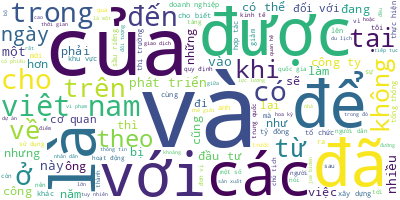

In [75]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [76]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # Sử dụng str.maketrans và translate để loại bỏ dấu câu
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    return ViTokenizer.tokenize(text) 

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        # loại bỏ dấu câu and split
        yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(remove_punctuation_underscore(str(sentence)))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

data = papers['paper_text_processed'].apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_number(x))
data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
# text = data[0]
# print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Embedding

In [77]:
sentence_model = SentenceTransformer("keepitreal/vietnamese-sbert")
embeddings = sentence_model.encode(docs, show_progress_bar=False)

### Training model with bertopic
#### Parameters
##### BERTopic

- language: Ngôn ngữ, ở đây là vietnamese
- top_n_words: số lượng từ được sử dụng để mô tả mỗi chủ đề
- n_gram_range: số lượng từ trong một n-gram
- min_topic_size: số lượng tài liệu tối thiểu trong mỗi chủ đề
- nr_topics: số lượng topic cần phát hiện
- low_memory: sử dụng low memory mode để sử dụng ít bộ nhớ hơn
- calculate_probabilities: tính xác suất của từng từ trong topic
##### UMAP: 
UMAP là một kỹ thuật tuyệt vời để giảm kích thước. Trong BERTopic, nó được sử dụng để giảm tính chiều của việc nhúng tài liệu vào thứ gì đó dễ sử dụng hơn với HDBSCAN để tạo các cụm tốt. Tuy nhiên, nó có một số lượng đáng kể các tham số mà bạn có thể tính đến. Vì việc hiển thị tất cả các tham số trong BERTopic sẽ khó quản lý nên chúng ta có thể khởi tạo mô hình UMAP của mình và chuyển nó sang BERTopic:
```md
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(umap_model=umap_model).fit(docs)
```
- n_neighbors: 
- n_components: số chiều của embedding vector sau khi giảm chiều bằng UMAP
- metric: độ đo khoảng cách giữa các điểm dữ liệu trong không gian vector embedding (có thể là cosine, euclidean, manhattan, chebyshev, minkowski, canberra, braycurtis, mahalanobis, wminkowski, seuclidean, cosine, correlation, haversine, hamming, jaccard, dice, russellrao, kulsinski, rogerstanimoto, sokalmichener, sokalsneath, yule, or matching)
- low_memory: low_memory được sử dụng khi tập dữ liệu có thể tiêu tốn nhiều bộ nhớ. Việc sử dụng hàng triệu tài liệu có thể dẫn đến các vấn đề về bộ nhớ và việc đặt giá trị này thành True có thể giảm bớt tiêu hao bộ nhớ.

##### HDBSCAN
Sau khi giảm số chiều của embedding vector, Chúng tôi sử dụng HDBSCAN để phân cụm các tập docs thành các cụm tài liệu tương tự nhau. Tương tự như UMAP, HDBSCAN có nhiều tham số để tuỳ chỉnh:
```md
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model).fit(docs)
```
- min_cluster_size: số lượng tài liệu tối thiểu trong mỗi cụm
- min_samples: số lượng tài liệu tối thiểu trong mỗi cụm
- metric: được sử dụng để tính khoảng cách. Ở đây, chúng tôi đã sử dụng euclide vì sau khi giảm kích thước, chúng tôi có dữ liệu có chiều nhỏ và không cần tối ưu hóa nhiều. Tuy nhiên, nếu tăng n_comComponents trong UMAP thì nên xem xét các số liệu hoạt động với dữ liệu nhiều chiều.
- prediction_data: nếu True thì sẽ trả về các điểm dữ liệu được dự đoán cho mỗi cụm. Điều này có thể được sử dụng để phân tích các cụm và xác định các điểm nhiễu.


In [78]:
nr_topics = 10
topic_model = BERTopic(language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics)
topics, probs = topic_model.fit_transform(docs, embeddings)
# print(topic_model.get_topic_info())
# print(topic_model.get_topic_freq().head())

2023-09-18 16:44:28,066 - BERTopic - Reduced dimensionality
2023-09-18 16:44:28,086 - BERTopic - Clustered reduced embeddings


# VISUALIZE TOPIC MODEL

### Visualize Documents

In [79]:
topic_model.visualize_documents(docs, embeddings=embeddings)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_documents(docs, reduced_embeddings=reduced_embeddings)

#### Custom Hover

In [80]:
titles = [i for i in papers["title"]]
topic_model.visualize_documents(titles, reduced_embeddings=reduced_embeddings)

### Visualize Topic Hierarchy

In [81]:
# hierarchical: phân cấp
topic_model.visualize_hierarchy()

#### Text-based topic tree
- Mặc dù cấu trúc chung khó xem hơn nhưng chúng ta có thể thấy rõ hơn những chủ đề nào có thể được hợp nhất một cách hợp lý

In [82]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
tree = topic_model.get_topic_tree(hierarchical_topics)
print(tree)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 68.49it/s]

.
├─■──nam_tỉnh_ảnh_hai_công_an ── Topic: 0
└─■──đồng_cổ_phiếu_mã_giao_dịch_tỷ ── Topic: 1



### Visualize Hierarchical Documents

In [83]:
hierarchical_topics = topic_model.hierarchical_topics(docs)

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 64.53it/s]


In [84]:
topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, embeddings=embeddings)

# Reduce dimensionality of embeddings, this step is optional but much faster to perform iteratively:
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
topic_model.visualize_hierarchical_documents(docs, hierarchical_topics, reduced_embeddings=reduced_embeddings)

IndexError: index -1 is out of bounds for axis 0 with size 0

### Visualize Terms
- Chúng ta có thể trực quan hóa các từ được chọn cho một số chủ đề bằng cách tạo biểu đồ cột từ điểm c-TF-IDF cho mỗi biểu đồ đại diện chủ đề. Có thể thu thập thông tin từ các điểm c-TF-IDF tương đối giữa các chủ đề và bên trong chúng. Hơn nữa, bạn có thể dễ dàng so sánh các biểu đồ đại diện chủ đề với nhau. Để trực quan hóa cấu trúc này, hãy chạy đoạn mã sau:

In [ ]:
topic_model.visualize_barchart()

### Visualize Topic Similarity

In [ ]:
topic_model.visualize_heatmap()

### Visualize Term Score Decline

In [ ]:
topic_model.visualize_term_rank()

In [ ]:
topic_model.visualize_term_rank(log_scale=True)


### Visualize Topics per Class

In [ ]:
classes = [i for i in papers["title"]]
topics_per_class = topic_model.topics_per_class(docs, classes=classes)
topic_model.visualize_topics_per_class(topics_per_class)

229it [00:01, 133.33it/s]


### Visualize Probablities or Distribution

In [ ]:
topic_model.visualize_distribution(probs[0])

#### Visualize the token-level distributions
- Visualize: Hiển thị sự đóng góp của các từ trong một tài liệu với một chủ đề cụ thể hay nói cách khác là phân phối xác suất của các từ trong một chủ đề cụ thể với một bài viết. Để trực quan hóa phân phối này, hãy chạy đoạn mã sau:

In [ ]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


,cơ_sở,điều_hành,liên_bộ,doanh_nghiệp,đồng_loạt,điều_chỉnh,giá,dầu,hôm_nay,giá,dầu_diesel,đồng,lít,giá,đồng,lít,giá,xăng_e,nguyên,đồng,lít,xăng,ron,đứng,yên,đồng,lít,kỳ,điều_hành,liên_bộ,công_thương,tài_chính,trích_lập,quỹ,bình_ổn,giá,mặt_hàng,xăng,dầu,chi,quỹ,bình_ổn,hai,mặt_hàng,dầu_diesel,dầu_hỏa,chi,quỹ,bình_ổn,xăng,dầu,mazut,công_thương,thị_trường,xăng,dầu,thế_giới,kỳ,điều_hành,ảnh_hưởng,yếu_tố,lo_ngại,cung,xăng,dầu,thắt,chặt,rập,xê,út,nga,gia_hạn,cắt_giảm,cung,tổ_chức,xuất_khẩu,dầu_mỏ,đồng_minh,opec,thắt,chặt,thị_trường,mùa,đông,triển_vọng,nhu_cầu,trung,quốc,mong_đợi,tốc_độ,phục_hồi,kinh_tế,chậm_chạp,tình_hình,lạm_phát,kinh_tế,thế_giới,yếu_tố,nêu,giá,xăng,dầu,biến_động,nhẹ,đan_xen,bình_quân,giá_thành_phẩm,xăng,dầu,thế_giới,kỳ,điều_hành,giá,kỳ,điều_hành,usd,thùng,xăng,ron,pha_chế,xăng_e,ron,usd,thùng,usd,thùng,xăng,ron,usd,thùng,usd,thùng,dầu_hỏa,usd,thùng,usd,thùng,dầu_diesel,usd,thùng,usd,dầu,mazut,usd,kỳ_vọng,giá,xăng,chấm_dứt,mạch,phiên,liên_tiếp,đầu,giá,xăng,trải,điều_chỉnh,nguyên,hương
1_đồng_cổ_phiếu_mã_giao_dịch,0.000,0.000,0.000,0.000,0.000,0.121,0.266,0.368,0.562,0.601,0.616,0.781,0.712,0.755,0.749,0.482,0.526,0.434,0.417,0.543,0.375,0.264,0.255,0.259,0.385,0.514,0.385,0.255,0.129,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.108,0.232,0.232,0.232,0.124,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.131,0.131,0.131,0.131,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.105,0.105,0.105,0.105,0.113,0.254,0.254,0.254,0.141,0.000,0.119,0.315,0.429,0.543,0.423,0.228,0.113,0.000,0.000,0.000
